<a href="https://www.kaggle.com/code/lalit82/estimating-second-hand-laptop-price?scriptVersionId=126832933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


In [2]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv', encoding = 'latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


* **The Laptop dataset provided is having total 12 columns and chose the Price_euros as the target variable or dependent one**
> There are only three non numeric columns i.e. laptop_ID, Inches (Screen size of the laptop and Price_euros which obviuosly is to be predicted by the model I am going to work along)

In [5]:
df.describe(percentiles=[0.01,0.25,0.50,0.75,0.9])

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
1%,14.020000,11.600000,229.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
90%,1189.800000,17.300000,2040.800000
max,1320.000000,18.400000,6099.000000


In [6]:
df.notna().count().sum()

16939

In [7]:
df.shape

(1303, 13)

In [8]:
1303*13

16939

* **The shape and total number of non NULL or non NaN values is same whihc implies that there is no null values**

In [9]:
df.drop_duplicates()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [10]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [11]:
df.shape

(1303, 13)

* Since the shape is retained at this point from the original dataset. It is safe to assume that there are no duplicate values in the datatset
> **Data Quality is fair enough but only problem is that there are only ~1300 records. Now, I will see if we can convert some of the categorical values into meaningful numeric values as they are convenient to work upon if needed e.g. 'Ram', 'Weight' etcetra**

In [12]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [13]:
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [14]:
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object

* It is from above two columns that the dtype is object so I am changing the dtype to integer ones and float ones

In [15]:
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype(float)

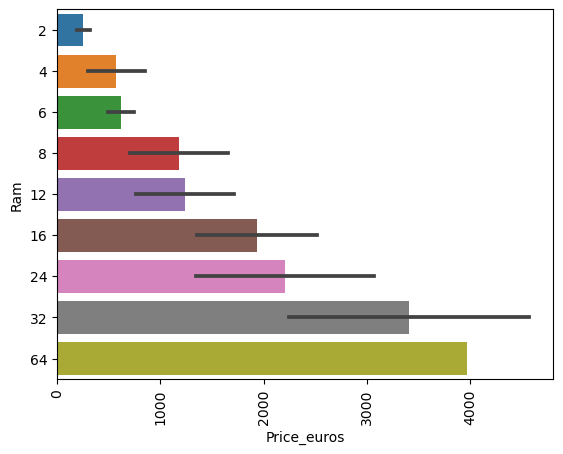

In [16]:
sns.barplot(x = df['Price_euros'], y = df['Ram'], orient='h', errorbar = 'sd')
plt.xticks(rotation = 'vertical')
plt.show()

* **There is good amount of variability in 24GB Ram and 32 GB Ram, As there is only one 64GB price, it doesn't show the error bar**
* **More is the memory for Ram, the price is getting increased with it.**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


* At this point of time in 2023, there are three main players vis-a-vis OS market 

e.g. 

> **Microsoft which owns Windows, Apple which have macOS, Linux which is an Open source tool.** 

* Hence for OpSys column we can seggregate it into three categories, Windows, macOS and Open Source OS to simply the one hot encoding which will be done later

In [18]:
df.value_counts('OpSys')

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
dtype: int64

* As evident from the above **Windows 10, Windows 7, Windows 10 S** can be grouped in Windows
* **macOS** and **Mac OS X** can be categorised into macOS
* Others like **No OS, Linux, Chrome OS, Android** can be given a seperate category like Open Source OS as this is the thing which they have in common with each other

In [19]:
def os_br(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x == 'macOS' or x == 'Mac OS X':
        return 'Mac'
    else:
        return 'Open Source OS'

In [20]:
df['os'] = df['OpSys'].apply(os_br)
df.drop(columns = ['OpSys'], inplace = True)

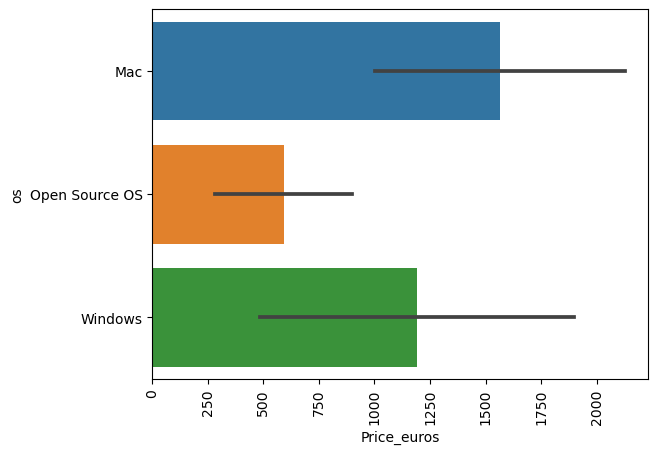

In [21]:
sns.barplot(x = df['Price_euros'], y = df['os'], orient='h', errorbar = 'sd')
plt.xticks(rotation = 'vertical')
plt.show()

In [22]:
df.value_counts('os')

os
Windows           1125
Open Source OS     157
Mac                 21
dtype: int64

* **Price of Windows Laptop is varying highly as compared to Open Source OS laptops and is closely deviating from its mean to a macOS values in the dataframe** 
* OpenSource laptop are more economical when compared to macOS ones and Windows ones
* In the dataset there are fewer prices for Mac laptop and it seems like OpenSource laptops are trying to catch up market to the industry leader i.e. Microsoft Windows

In [23]:
df.value_counts('os')

os
Windows           1125
Open Source OS     157
Mac                 21
dtype: int64

In [24]:
df.value_counts('Memory')

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
64GB Flash Storage +  1TB HDD  

In [25]:
#There are GBs, TBs and decimal in the Memory column
# Since decimal are like 1.0 we can safely remove the decimal 
#and take the memory unit in terns of GB and hence TBs are to be converted into GBs 
#(1TB is roughly 1000GB)
# remove the GBs after converting the TBs in the column
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [26]:
df.value_counts('Memory')

Memory
256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB HDD                      

In [27]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [28]:
df['Memory']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [29]:
df['Memory'].dtype

dtype('O')

> It is of String type so there is a possibility that we can seggregate amount of memory and the type of the Hard disc inot seperate columns which will mean that the first column will be numerical and second will be used for OHE later. Also, there are some values which are having SSD and HDD both of certain value of memory with them. The strategy here is to get the HDD, SSD, Hybrid and Flash Storage associated with their respective memories and put each of the type in a seperate column. For this I will split the string in the memory column and will put it to two seperate columns and then change them to values of amount of memories in GB depending upon whether it is SSD or HDD or Hybrid or Flash Storage.

In [30]:
temp_col = df["Memory"].str.split("+", n = 1, expand = True)
#split is used and the string value is going to be splitted on '+' and 
#will give two columns when n= 1 with expand argument facilitating the 
#seperation of column by increasing the dimensionality 

In [31]:
df['first'] = temp_col[0]
df['second'] = temp_col[1]
#accessing the two columns which were result of the previous Snippet. 
#Each of them contain values and as df['first'] will tend to have non-zero values 
#always and df['second'] will have some zero values which is quite evident 
#from the column values
# Now i will just 

In [32]:
df['first']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [33]:
df['second']

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: second, Length: 1303, dtype: object

In [34]:
df['second'].fillna('0', inplace = True)

In [35]:
df['second']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: object

In [36]:
df["first"] = df["first"].str.strip()

In [37]:
df['first']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [38]:
df["temp_HDD_1"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["temp_SSD_1"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["temp_Hybrid_1"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["temp_Flash_Storage_1"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [39]:
df["first"] = df["first"].str.replace(r'\D', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [40]:
df["temp_HDD_2"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["temp_SSD_2"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["temp_Hybrid_2"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["temp_Flash_Storage_2"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [41]:
df["second"] = df["second"].str.replace(r'\D', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [42]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [43]:
df["HDD"]=(df["first"]*df["temp_HDD_1"]+df["second"]*df["temp_HDD_2"])
df["SSD"]=(df["first"]*df["temp_SSD_1"]+df["second"]*df["temp_SSD_2"])
df["Hybrid"]=(df["first"]*df["temp_Hybrid_1"]+df["second"]*df["temp_Hybrid_2"])
df["Flash_Storage"]=(df["first"]*df["temp_Flash_Storage_1"]+df["second"]*df["temp_Flash_Storage_2"])

In [44]:
df.drop(columns=['first', 'second', 'temp_HDD_1', 'temp_SSD_1', 'temp_Hybrid_1', 'temp_Flash_Storage_1', 'temp_HDD_2', 'temp_SSD_2', 'temp_Hybrid_2', 'temp_Flash_Storage_2'], inplace = True)

In [45]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,os,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,1.37,1339.69,Mac,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,1.34,898.94,Mac,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,1.86,575.00,Open Source OS,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,1.83,2537.45,Mac,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,1.37,1803.60,Mac,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,1.80,638.00,Windows,0,128,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,1.30,1499.00,Windows,0,512,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,1.50,229.00,Windows,0,0,0,64
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,2.19,764.00,Windows,1000,0,0,0


In [46]:
df.drop(columns = ['Memory'], inplace = True)

In [47]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,os,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,1.37,1339.69,Mac,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,1.34,898.94,Mac,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,1.86,575.00,Open Source OS,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,1.83,2537.45,Mac,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,1.37,1803.60,Mac,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,1.80,638.00,Windows,0,128,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,1.30,1499.00,Windows,0,512,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,1.50,229.00,Windows,0,0,0,64
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,2.19,764.00,Windows,1000,0,0,0


> I found out that the price of Laptop has less dependency of clock speed ofthe processor as more speed doesn't specifically raise the price, so I am going to split the values till the generation of the Cpu

In [48]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [49]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [50]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,os,HDD,SSD,Hybrid,Flash_Storage,Cpu Name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,1.37,1339.69,Mac,0,128,0,0,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,1.34,898.94,Mac,0,0,0,128,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,1.86,575.00,Open Source OS,0,256,0,0,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,1.83,2537.45,Mac,0,512,0,0,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,1.37,1803.60,Mac,0,256,0,0,Intel Core i5


In [51]:
def processor_type(cp):
    if cp == 'Intel Core i7' or cp == 'Intel Core i5' or cp == 'Intel Core i3':
        return cp
    else:
        if cp.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [52]:
df['Cpu brand'] = df['Cpu Name'].apply(processor_type)

In [53]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,os,HDD,SSD,Hybrid,Flash_Storage,Cpu Name,Cpu brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,1.37,1339.69,Mac,0,128,0,0,Intel Core i5,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,1.34,898.94,Mac,0,0,0,128,Intel Core i5,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,1.86,575.00,Open Source OS,0,256,0,0,Intel Core i5,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,1.83,2537.45,Mac,0,512,0,0,Intel Core i7,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,1.37,1803.60,Mac,0,256,0,0,Intel Core i5,Intel Core i5


In [54]:
df.drop(columns=['Cpu','Cpu Name'], inplace=True)

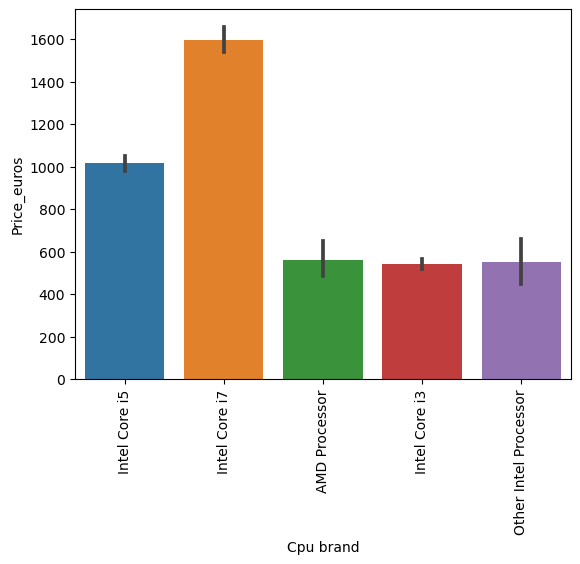

In [55]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros']);
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Gpu               1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price_euros       1303 non-null   float64
 10  os                1303 non-null   object 
 11  HDD               1303 non-null   int64  
 12  SSD               1303 non-null   int64  
 13  Hybrid            1303 non-null   int64  
 14  Flash_Storage     1303 non-null   int64  
 15  Cpu brand         1303 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory 

In [57]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [58]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [59]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [60]:
df = df[df['Gpu brand'] != 'ARM']

In [61]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

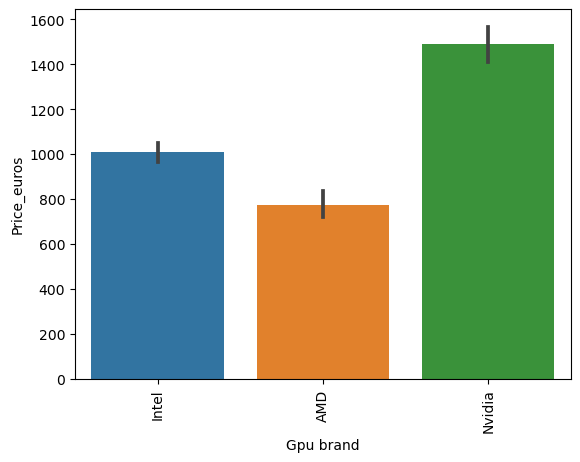

In [62]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df.drop(columns = ['Gpu'], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   Product           1302 non-null   object 
 3   TypeName          1302 non-null   object 
 4   Inches            1302 non-null   float64
 5   ScreenResolution  1302 non-null   object 
 6   Ram               1302 non-null   int64  
 7   Weight            1302 non-null   float64
 8   Price_euros       1302 non-null   float64
 9   os                1302 non-null   object 
 10  HDD               1302 non-null   int64  
 11  SSD               1302 non-null   int64  
 12  Hybrid            1302 non-null   int64  
 13  Flash_Storage     1302 non-null   int64  
 14  Cpu brand         1302 non-null   object 
 15  Gpu brand         1302 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory 

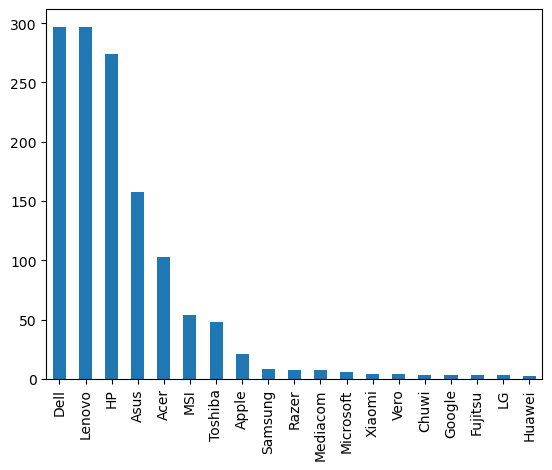

In [65]:
df['Company'].value_counts().plot(kind = 'bar');

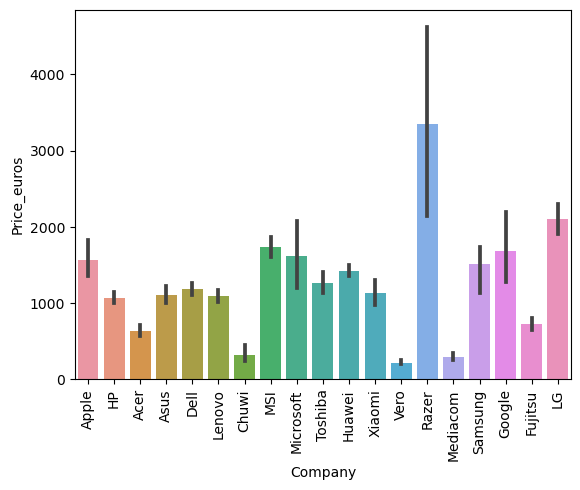

In [66]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

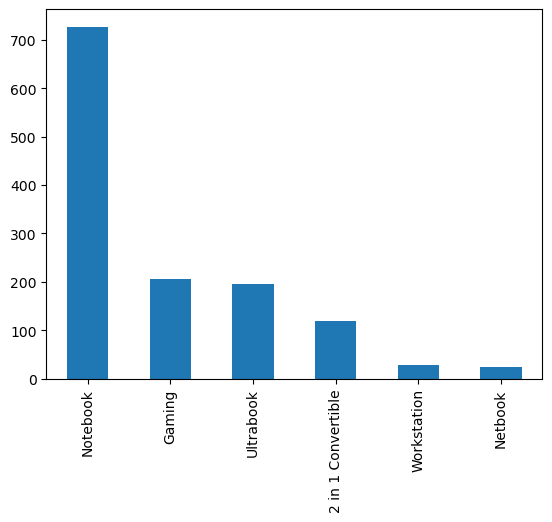

In [67]:
df['TypeName'].value_counts().plot(kind='bar');

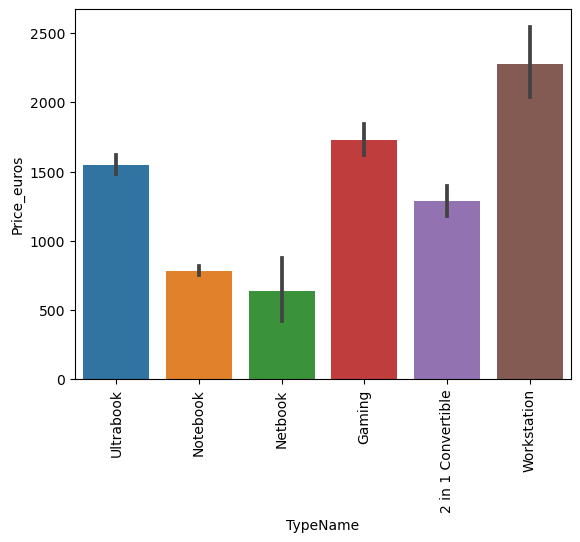

In [68]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


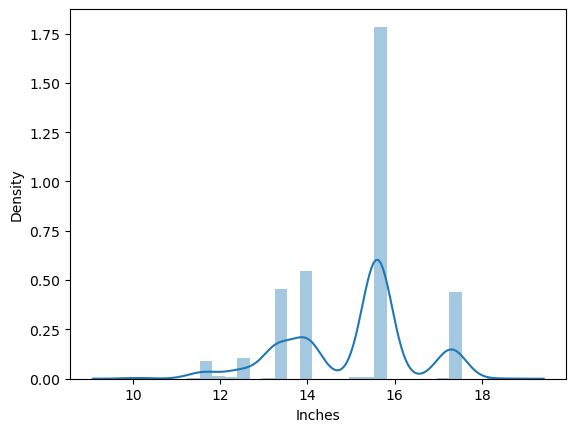

In [69]:
sns.distplot(df['Inches']);

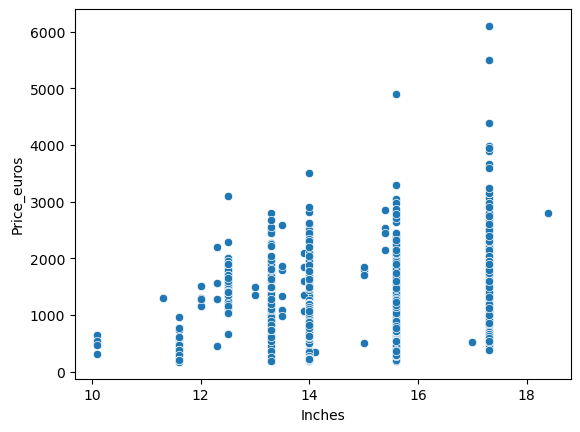

In [70]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros']);

In [71]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


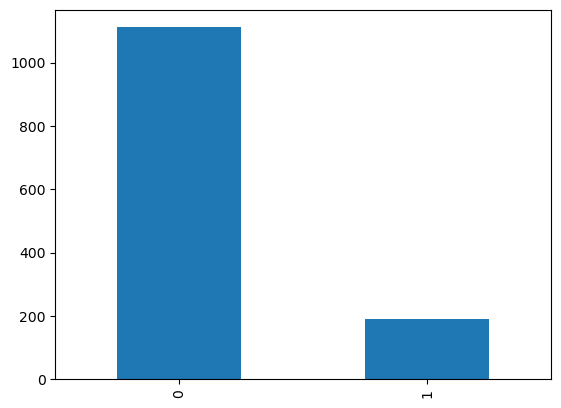

In [72]:
df['Touchscreen'].value_counts().plot(kind='bar');

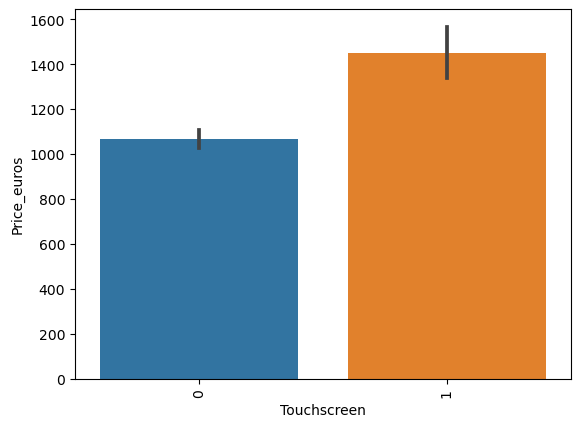

In [73]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
df['IPS Panel Retina Display'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df['Full_HD'] = df['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.drop(columns = ['ScreenResolution'], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   laptop_ID                 1302 non-null   int64  
 1   Company                   1302 non-null   object 
 2   Product                   1302 non-null   object 
 3   TypeName                  1302 non-null   object 
 4   Inches                    1302 non-null   float64
 5   Ram                       1302 non-null   int64  
 6   Weight                    1302 non-null   float64
 7   Price_euros               1302 non-null   float64
 8   os                        1302 non-null   object 
 9   HDD                       1302 non-null   int64  
 10  SSD                       1302 non-null   int64  
 11  Hybrid                    1302 non-null   int64  
 12  Flash_Storage             1302 non-null   int64  
 13  Cpu brand                 1302 non-null   object 
 14  Gpu bran

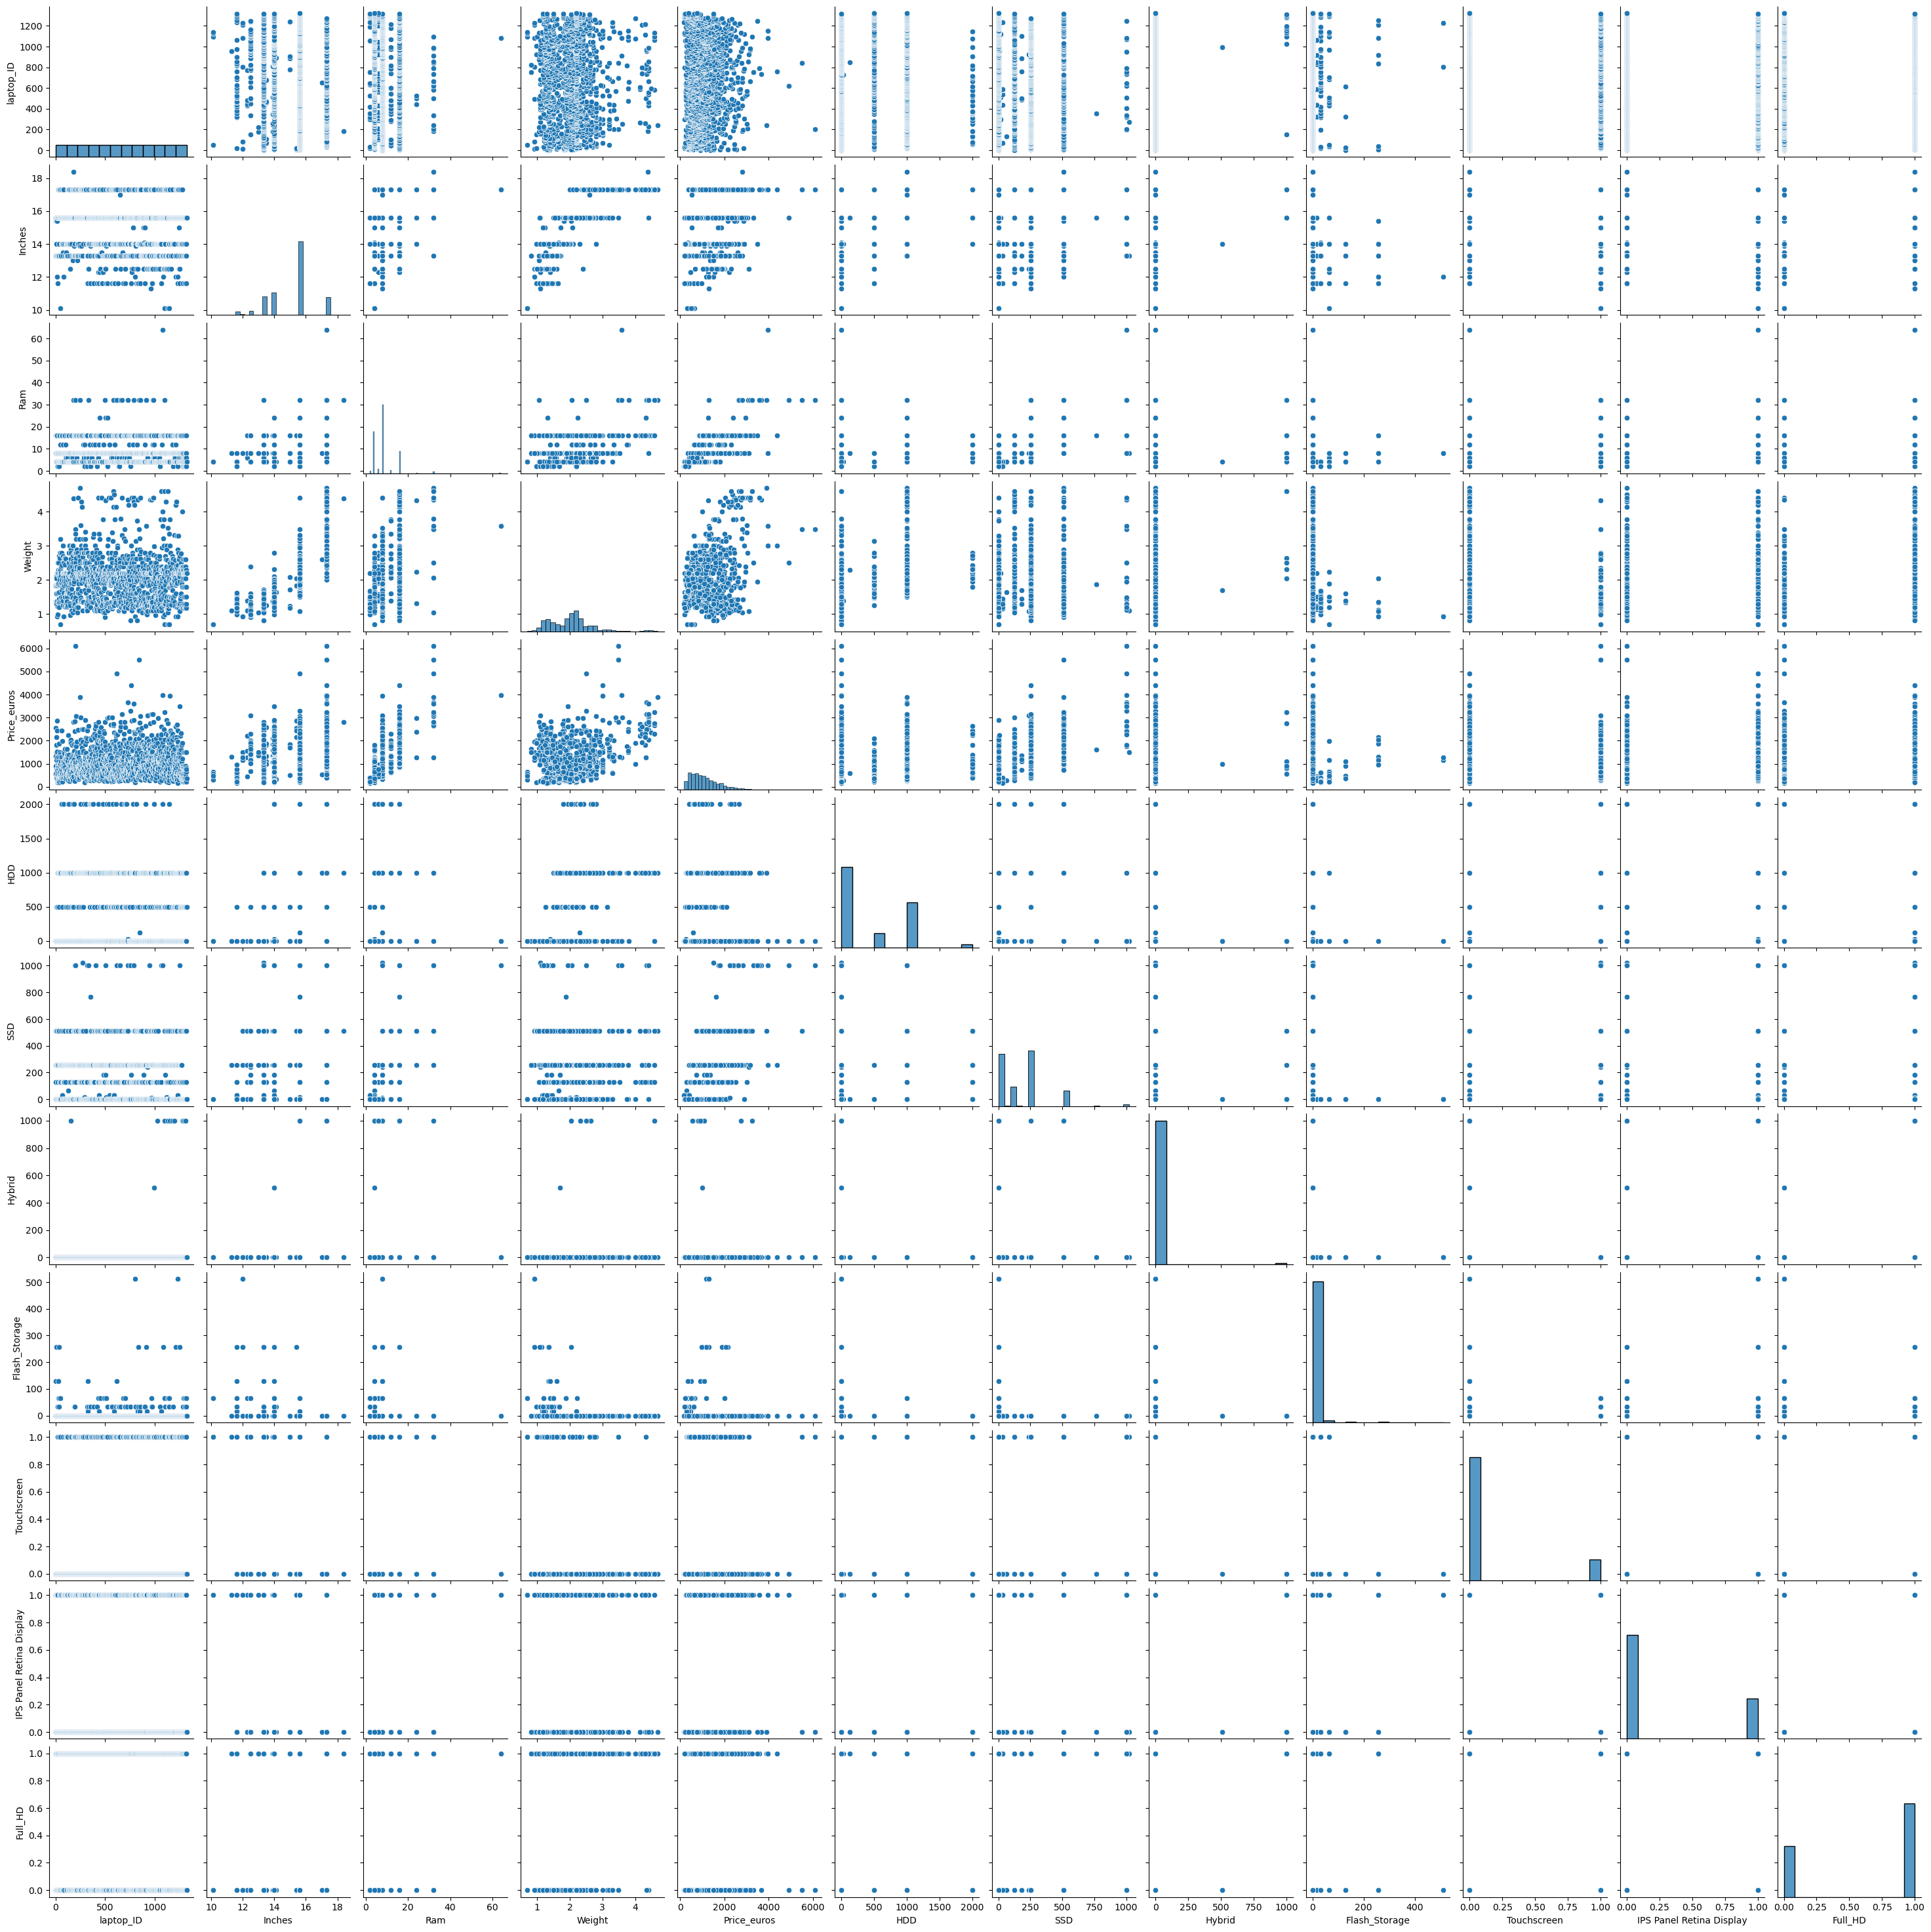

In [78]:
import seaborn as sns
sns.pairplot(data = df);

In [79]:
categorical_cols = ['TypeName', 'os', 'Cpu brand', 'Gpu brand'] 
df = pd.get_dummies(df, columns = categorical_cols)

In [80]:
df.shape

(1302, 31)

In [81]:
df['Company'].value_counts().sort_values(ascending=False).head(20)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [82]:
df['Product'].value_counts().sort_values(ascending=False).head(20)

XPS 13                30
Inspiron 3567         29
250 G6                21
Legion Y520-15IKBN    19
Vostro 3568           19
Inspiron 5570         18
ProBook 450           18
Alienware 17          15
Inspiron 5567         14
Satellite Pro         13
EliteBook 840         12
Latitude 5580         12
ThinkPad X1           12
Aspire 3              12
Inspiron 7567         10
EliteBook 850         10
MacBook Pro           10
XPS 15                 9
Inspiron 3552          9
EliteBook 820          9
Name: Product, dtype: int64

In [83]:
top_20_comp = [x for x in df['Company'].value_counts().sort_values(ascending=False).head(20).index]
top_20_comp

['Dell',
 'Lenovo',
 'HP',
 'Asus',
 'Acer',
 'MSI',
 'Toshiba',
 'Apple',
 'Samsung',
 'Mediacom',
 'Razer',
 'Microsoft',
 'Xiaomi',
 'Vero',
 'Chuwi',
 'Google',
 'Fujitsu',
 'LG',
 'Huawei']

In [84]:
top_20_prod = [x for x in df['Product'].value_counts().sort_values(ascending=False).head(20).index]
top_20_prod

['XPS 13',
 'Inspiron 3567',
 '250 G6',
 'Legion Y520-15IKBN',
 'Vostro 3568',
 'Inspiron 5570',
 'ProBook 450',
 'Alienware 17',
 'Inspiron 5567',
 'Satellite Pro',
 'EliteBook 840',
 'Latitude 5580',
 'ThinkPad X1',
 'Aspire 3',
 'Inspiron 7567',
 'EliteBook 850',
 'MacBook Pro',
 'XPS 15',
 'Inspiron 3552',
 'EliteBook 820']

In [85]:
def one_hot_20(data, variable, top_20_labels):
    for label in top_20_labels:
        data[variable + '_' + label] = np.where(data[variable] == label, 1, 0)

In [86]:
one_hot_20(df, 'Company', top_20_comp)
df.head()

,laptop_ID,Company,Product,Inches,Ram,Weight,Price_euros,HDD,SSD,Hybrid,...,Company_Mediacom,Company_Razer,Company_Microsoft,Company_Xiaomi,Company_Vero,Company_Chuwi,Company_Google,Company_Fujitsu,Company_LG,Company_Huawei
0,1,Apple,MacBook Pro,13.3,8,1.37,1339.69,0,128,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Apple,Macbook Air,13.3,8,1.34,898.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,HP,250 G6,15.6,8,1.86,575.00,0,256,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Apple,MacBook Pro,15.4,16,1.83,2537.45,0,512,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Apple,MacBook Pro,13.3,8,1.37,1803.60,0,256,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
one_hot_20(df, 'Product', top_20_prod)
df.head()

,laptop_ID,Company,Product,Inches,Ram,Weight,Price_euros,HDD,SSD,Hybrid,...,Product_EliteBook 840,Product_Latitude 5580,Product_ThinkPad X1,Product_Aspire 3,Product_Inspiron 7567,Product_EliteBook 850,Product_MacBook Pro,Product_XPS 15,Product_Inspiron 3552,Product_EliteBook 820
0,1,Apple,MacBook Pro,13.3,8,1.37,1339.69,0,128,0,...,0,0,0,0,0,0,1,0,0,0
1,2,Apple,Macbook Air,13.3,8,1.34,898.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,HP,250 G6,15.6,8,1.86,575.00,0,256,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Apple,MacBook Pro,15.4,16,1.83,2537.45,0,512,0,...,0,0,0,0,0,0,1,0,0,0
4,5,Apple,MacBook Pro,13.3,8,1.37,1803.60,0,256,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
df.drop(columns = ['Company', 'Product'], inplace = True)

In [89]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,Touchscreen,...,Product_EliteBook 840,Product_Latitude 5580,Product_ThinkPad X1,Product_Aspire 3,Product_Inspiron 7567,Product_EliteBook 850,Product_MacBook Pro,Product_XPS 15,Product_Inspiron 3552,Product_EliteBook 820
0,1,13.3,8,1.37,1339.69,0,128,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,13.3,8,1.34,898.94,0,0,0,128,0,...,0,0,0,0,0,0,0,0,0,0
2,3,15.6,8,1.86,575.00,0,256,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15.4,16,1.83,2537.45,0,512,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,256,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,128,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1299,1317,13.3,16,1.30,1499.00,0,512,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1300,1318,14.0,2,1.50,229.00,0,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
1301,1319,15.6,6,2.19,764.00,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
y = df['Price_euros']
X = df.drop(columns=['Price_euros'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=108)

In [95]:
model.fit(X_train, y_train)

LinearRegression()

In [96]:
model.intercept_

967.9071077929718

In [97]:
model.coef_

array([ 9.66212237e-02, -4.80510633e+01,  4.13213803e+01,  1.72113608e+02,
        7.20395226e-02,  9.55792384e-01,  1.07632375e-01,  5.05579487e-01,
        7.51041079e+01,  1.67367038e+01, -8.38182615e+00, -1.97184695e+02,
       -4.04415673e+01, -2.87732499e+02, -2.53715556e+02, -1.90366269e+01,
        7.98110945e+02, -3.84850015e+00, -6.66236341e+01,  7.04721343e+01,
       -1.56507896e+02, -3.13719002e+01,  1.08812070e+02,  1.75289301e+02,
       -9.62215748e+01, -4.08868669e+01,  3.60646610e+01,  4.82220594e+00,
       -1.73433475e+02, -1.33610209e+02, -7.19784766e+01, -1.72224182e+02,
       -2.64948401e+02,  2.72660581e+01,  1.01843946e+02, -3.84850015e+00,
        8.82775508e+01, -2.71947032e+02,  1.25894141e+03,  2.23963225e+02,
       -5.89620438e+01, -3.09418208e+02, -2.66398244e+02,  1.74199513e+02,
       -4.33104860e+02,  4.22585638e+02, -1.37203712e+02,  2.69764595e+02,
       -7.35850690e+01, -1.67083727e+02, -2.63406159e+02, -2.17120949e+01,
       -7.35259277e+01, -

In [98]:
model.predict(X_train)

array([ 509.99686105, 1401.23882811, 1288.85668073, ..., 1182.07152732,
        211.11332394, 1515.85952549])

In [99]:
y_train

144     369.0
680     997.9
480    1262.0
897     900.0
23      819.0
        ...  
854     787.0
459     639.9
145    1099.0
791     202.9
99     1249.0
Name: Price_euros, Length: 1041, dtype: float64

In [100]:
y_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 141124.14
Coefficient of determination: 0.74


In [102]:
Adj_r2 = 1-(1-(r2_score(y_test,y_pred)))*(261-1)/(261-67-1)

In [103]:
print("Adjusted R2 ", Adj_r2)

Adjusted R2  0.6481579902936276


In [104]:
X_test.shape

(261, 67)

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [106]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
     fs = SelectKBest(score_func=f_regression, k=10)
 # learn relationship from training data
     fs.fit(X_train, y_train)
 # transform train input data
     X_train_fs = fs.transform(X_train)
 # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs

In [107]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 5.365408
Feature 1: 3.254880
Feature 2: 1401.256930
Feature 3: 43.966744
Feature 4: 6.673770
Feature 5: 810.791318
Feature 6: 0.300149
Feature 7: 1.208080
Feature 8: 54.357224
Feature 9: 54.909949
Feature 10: 38.658236
Feature 11: 7.307179
Feature 12: 179.597230
Feature 13: 7.838189
Feature 14: 476.700284
Feature 15: 76.943138
Feature 16: 61.858037
Feature 17: 6.794313
Feature 18: 91.203874
Feature 19: 64.454762
Feature 20: 43.347055
Feature 21: 98.555490
Feature 22: 9.167196
Feature 23: 489.751469
Feature 24: 108.935221
Feature 25: 49.633742
Feature 26: 28.512674
Feature 27: 135.478026
Feature 28: 2.892974
Feature 29: 1.638221
Feature 30: 2.130130
Feature 31: 1.766186
Feature 32: 40.867042
Feature 33: 46.985146
Feature 34: 1.020283
Feature 35: 6.794313
Feature 36: 1.509067
Feature 37: 6.828223
Feature 38: 94.696893
Feature 39: 4.087115
Feature 40: 0.024359
Feature 41: 6.854526
Feature 42: 4.077301
Feature 43: 1.998436
Feature 44: 0.458604
Feature 45: 4.961844
Feature 46: 0.

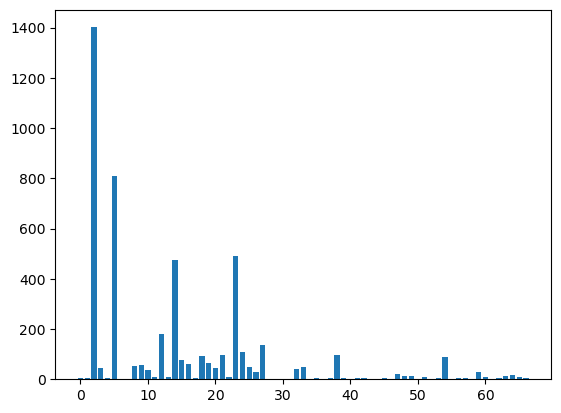

In [108]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()